In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

###Cargando los datos de entrada

In [2]:
datos=pd.read_csv('F:/Ingeniería Industrial e Engenharia de  Produção/Cursos de Informática y análisis de sistemas etc/UDACITY/Paso a paso ejemplo de machine learning/machine-learning-master/articulos_ml.csv')

In [3]:
datos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28.0,2,170,200000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
9,Artificial intelligence is going to completely...,NaN,1581,4,NaN,2,60,35000


In [4]:
datos.shape

(161, 8)

In [5]:
datos.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [6]:
datos.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


###viendo las caracteristicas de los datos

In [7]:
datos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [8]:
datos.dtypes

Title              object
url                object
Word count          int64
# of Links          int64
# of comments     float64
# Images video      int64
Elapsed days        int64
# Shares            int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1230D4F0>,
      dtype=object)

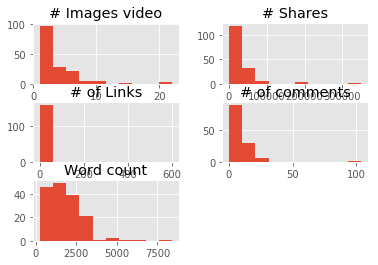

In [9]:
#visualizando las caracteristicas de entrada(las variables de entrada)
datos.drop(['Title','url','Elapsed days'],axis=1).hist()

In [10]:
filtered_data=datos[(datos['Word count']<=3500) & (datos['# Shares']<=80000)]

In [11]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data[['Title','Word count','# Shares']]
colores=['orange','blue'] # fijando los colores que voy a usar en el grafico
tamanos=[30,60]
f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values

In [12]:
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0]) #aqui ubicamos las mediciones que estan por encima de la media
    else:
        asignar.append(colores[1]) #aqui colocamos las mediciones que estan por debajo de la media

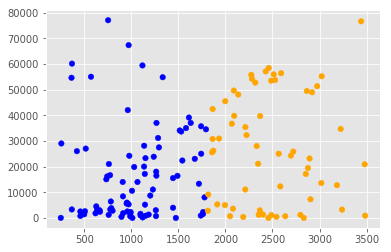

In [13]:
plt.scatter(f1, f2, c=asignar, s=tamanos[0])
#f1 serian los valores filtrados con Word count < 3500
#f2 serian los valores filtrados con # Shares entre 0 y 80000
plt.show()

In [14]:
#asignando X y Y respectivamente a las variables Word count y # Shares:
datosX=filtered_data[['Word count']]
X_train=np.array(datosX)
y_train=np.array(filtered_data['# Shares'])

In [15]:
X_train

array([[1742],
       [ 962],
       [ 761],
       [ 753],
       [1118],
       [1581],
       [ 256],
       [1267],
       [ 971],
       [ 369],
       [ 635],
       [1631],
       [ 571],
       [1333],
       [ 364],
       [ 515],
       [1135],
       [ 666],
       [ 787],
       [ 421],
       [1065],
       [ 908],
       [1260],
       [ 950],
       [1761],
       [ 911],
       [ 971],
       [ 458],
       [ 458],
       [ 782],
       [2080],
       [ 250],
       [1763],
       [ 650],
       [1184],
       [ 957],
       [ 627],
       [ 895],
       [1097],
       [1262],
       [1738],
       [1813],
       [2400],
       [ 662],
       [ 800],
       [ 367],
       [ 507],
       [ 992],
       [ 499],
       [ 619],
       [1152],
       [2363],
       [ 988],
       [ 759],
       [1098],
       [2797],
       [1120],
       [2488],
       [2049],
       [2542],
       [1011],
       [2189],
       [1864],
       [ 990],
       [1741],
       [1229],
       [29

In [16]:
regresion=linear_model.LinearRegression() #llamando la funcion de regresion 
# linear y creando el objeto de regresion linear
regresion.fit(X_train,y_train) #entrenando el modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred=regresion.predict(X_train)

In [18]:
regresion.coef_ #coeficiente de la recta, es decir, en la ecuacion y=bx+c, 
# el coeficiente seria el valor "b"

array([5.69765366])

In [19]:
regresion.intercept_ #intercepto de la recta, es decir, en la ecuacion y=bx+c, 
# el intercepto seria el valor "c"

11200.30322307416

In [20]:
print('y =',regresion.coef_,' X + ',regresion.intercept_)

y = [5.69765366]  X +  11200.30322307416


In [21]:
mean_squared_error(y_train,y_pred) #MSE

372888728.3398661

In [22]:
r2_score(y_train, y_pred) #r cuadrado

0.05519842281951404

### usando el modelo para predecir el resultado de una nueva prediccion de y

In [23]:
y_Dosmil = regresion.predict([[2000]])#2000 seria en este caso el valor de X,
#  es decir, el numero de palabras en el articulo.
#y_dosmil seria la cantidad de veces que se comprate el articulo

print(int(y_Dosmil))

22595


#Regresion Linear Multiple

In [24]:
suma=(filtered_data['# of Links']+filtered_data['# of comments'].fillna(0)+filtered_data['# Images video'])

In [25]:
datosX2=pd.DataFrame()
 
datosX2 =  pd.DataFrame()
datosX2["Word count"] = filtered_data["Word count"]
datosX2["suma"] = suma
XY_train = np.array(datosX2)
z_train = filtered_data['# Shares'].values

In [26]:
regresion_multiple=linear_model.LinearRegression()

In [27]:
regresion_multiple.fit(XY_train,z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
z_pred=regresion_multiple.predict(XY_train)

In [29]:
regresion_multiple.coef_

array([   6.63216324, -483.40753769])

In [30]:
regresion_multiple.intercept_

16921.89109834336

####z=6.63(Word count)-483.40(suma)+16921.89

In [31]:
mean_squared_error(z_train,z_pred)

352122816.4791501

In [32]:
r2_score(z_train,z_pred)

0.107813760282097

In [33]:
z_Dosmil=regresion_multiple.predict([[2000,10+4+6]])
int(z_Dosmil)

20518

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

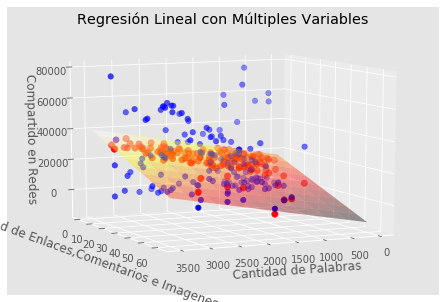

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regresion_multiple.coef_[0] * xx)
nuevoY = (regresion_multiple.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regresion_multiple.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.4, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=10., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
#plt.savefig('F:/dumps/Saida grafico regresion multiple')

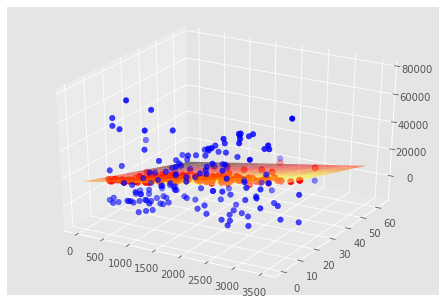

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
nuevoX = (regresion_multiple.coef_[0] * xx)
nuevoY = (regresion_multiple.coef_[1] * yy)
z = (nuevoX + nuevoY + regresion_multiple.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.5, cmap='hot')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)